In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0886010401_PN9grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.603e-03 +/- 1.011e-03 (37.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.705e+04 sec
 Using fit statistic: chi
 Using Background File                0886010401_PN9spec_bkg.fits
  Background Exposure Time: 1.705e+04 sec
 Using Response (RMF) File            0886010401_PN9spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886010401_PN9spec.arf



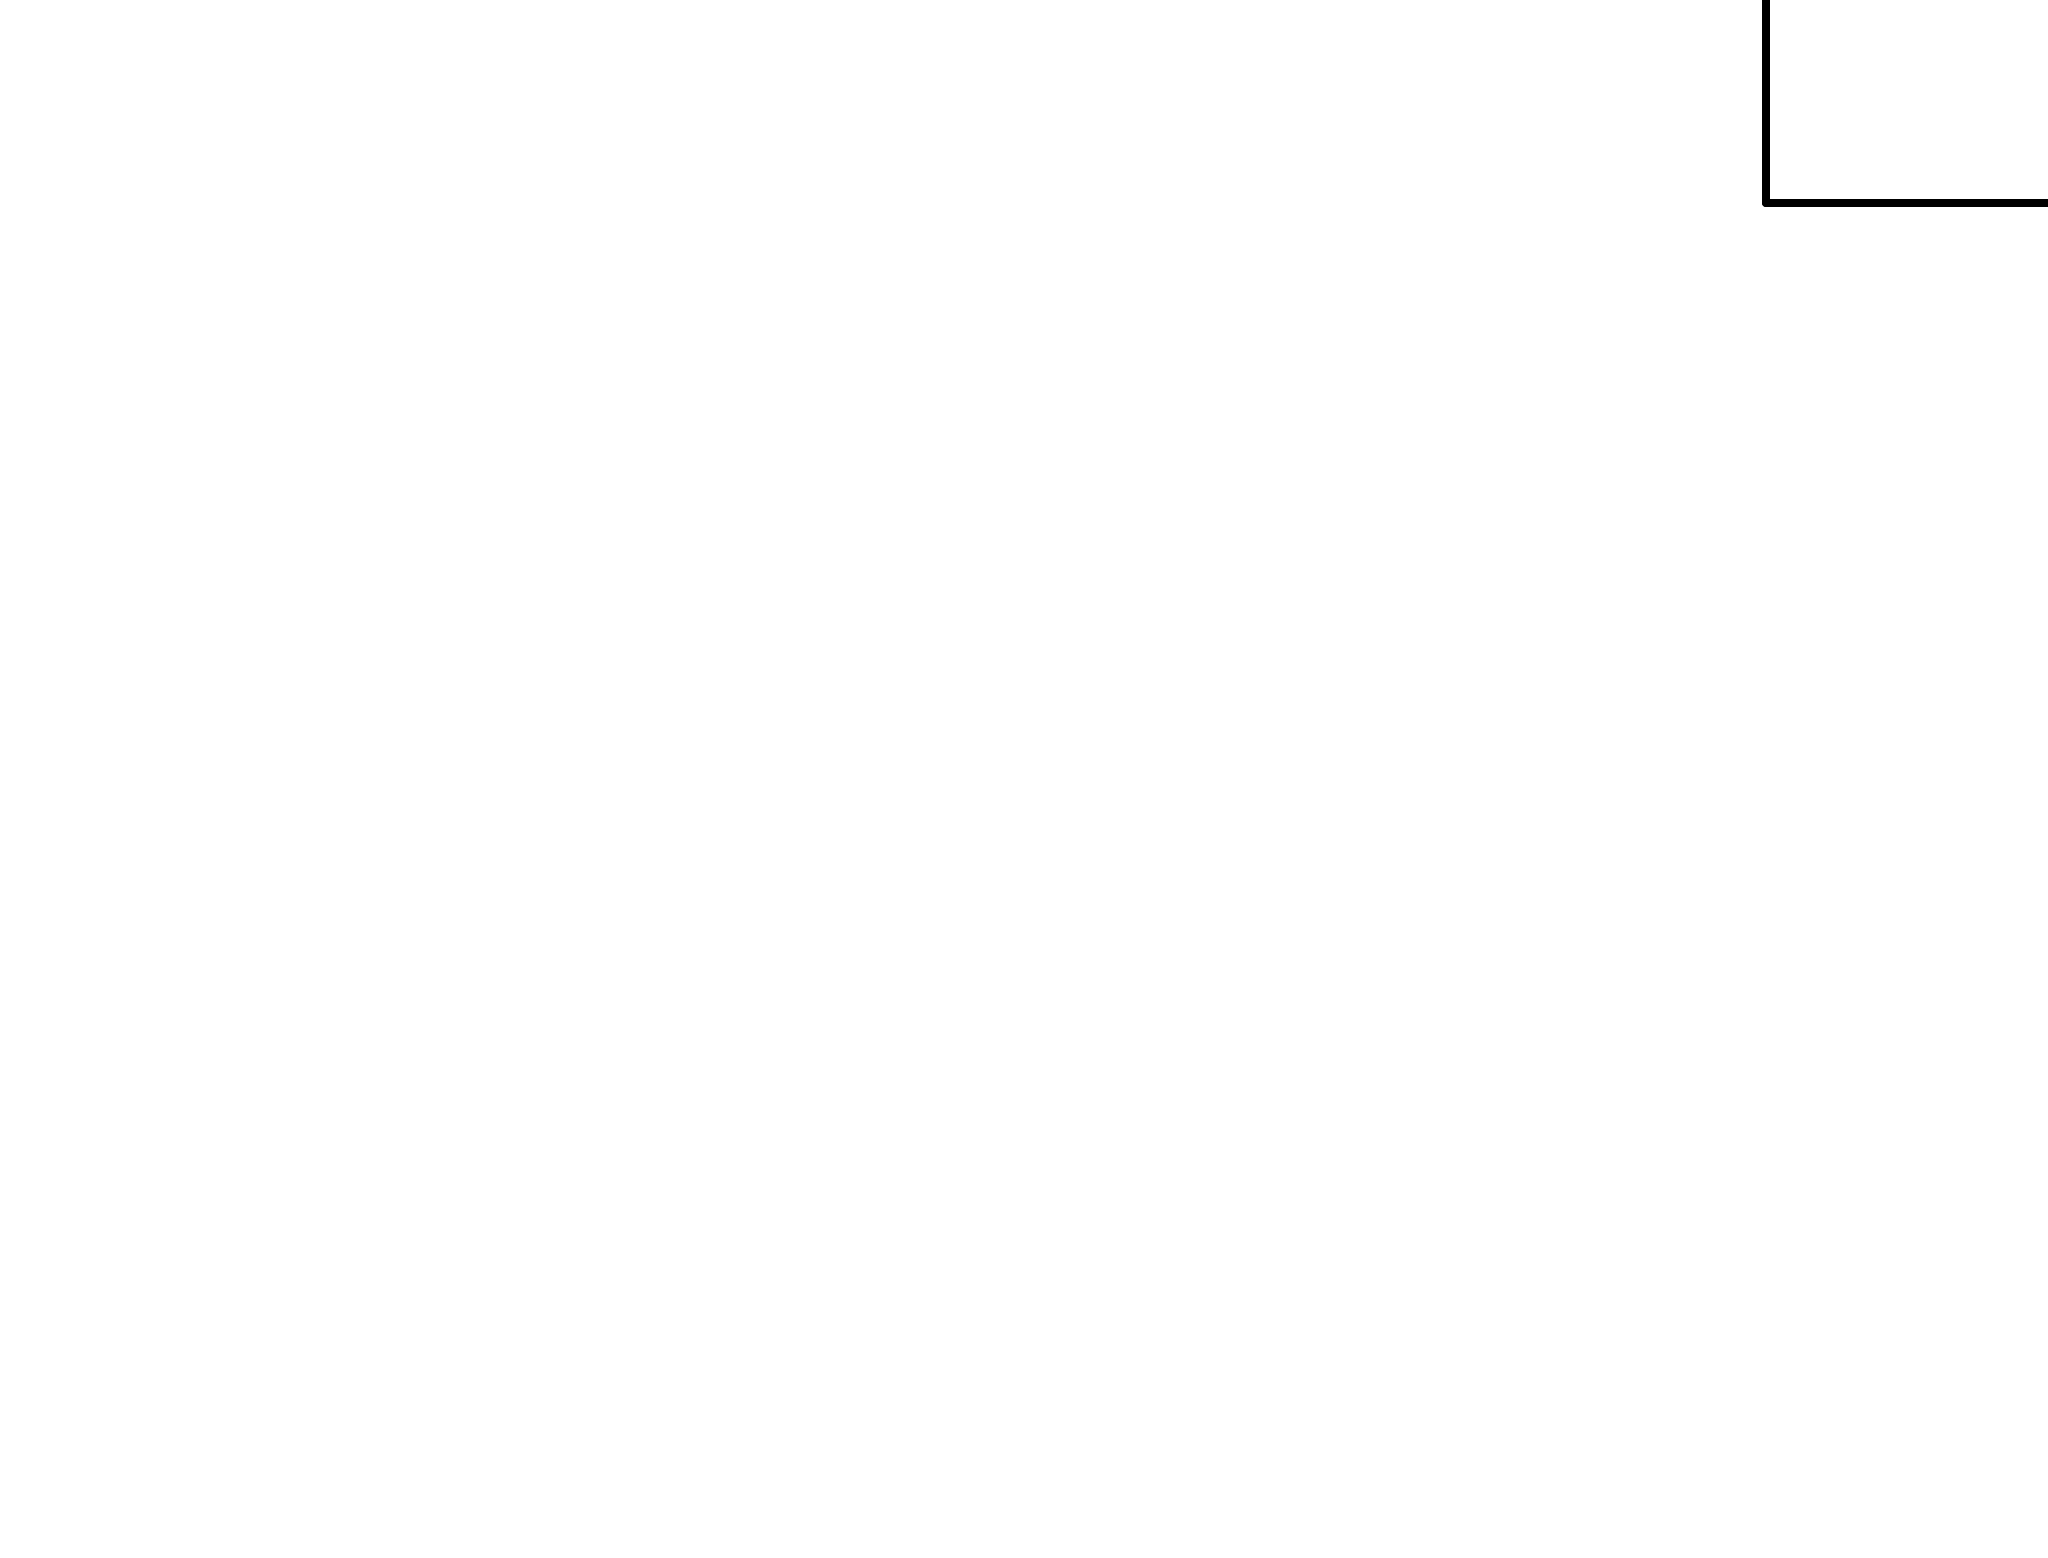

     2 channels (1-2) ignored in spectrum #     1
     2 channels (16-17) ignored in spectrum #     1



In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Square

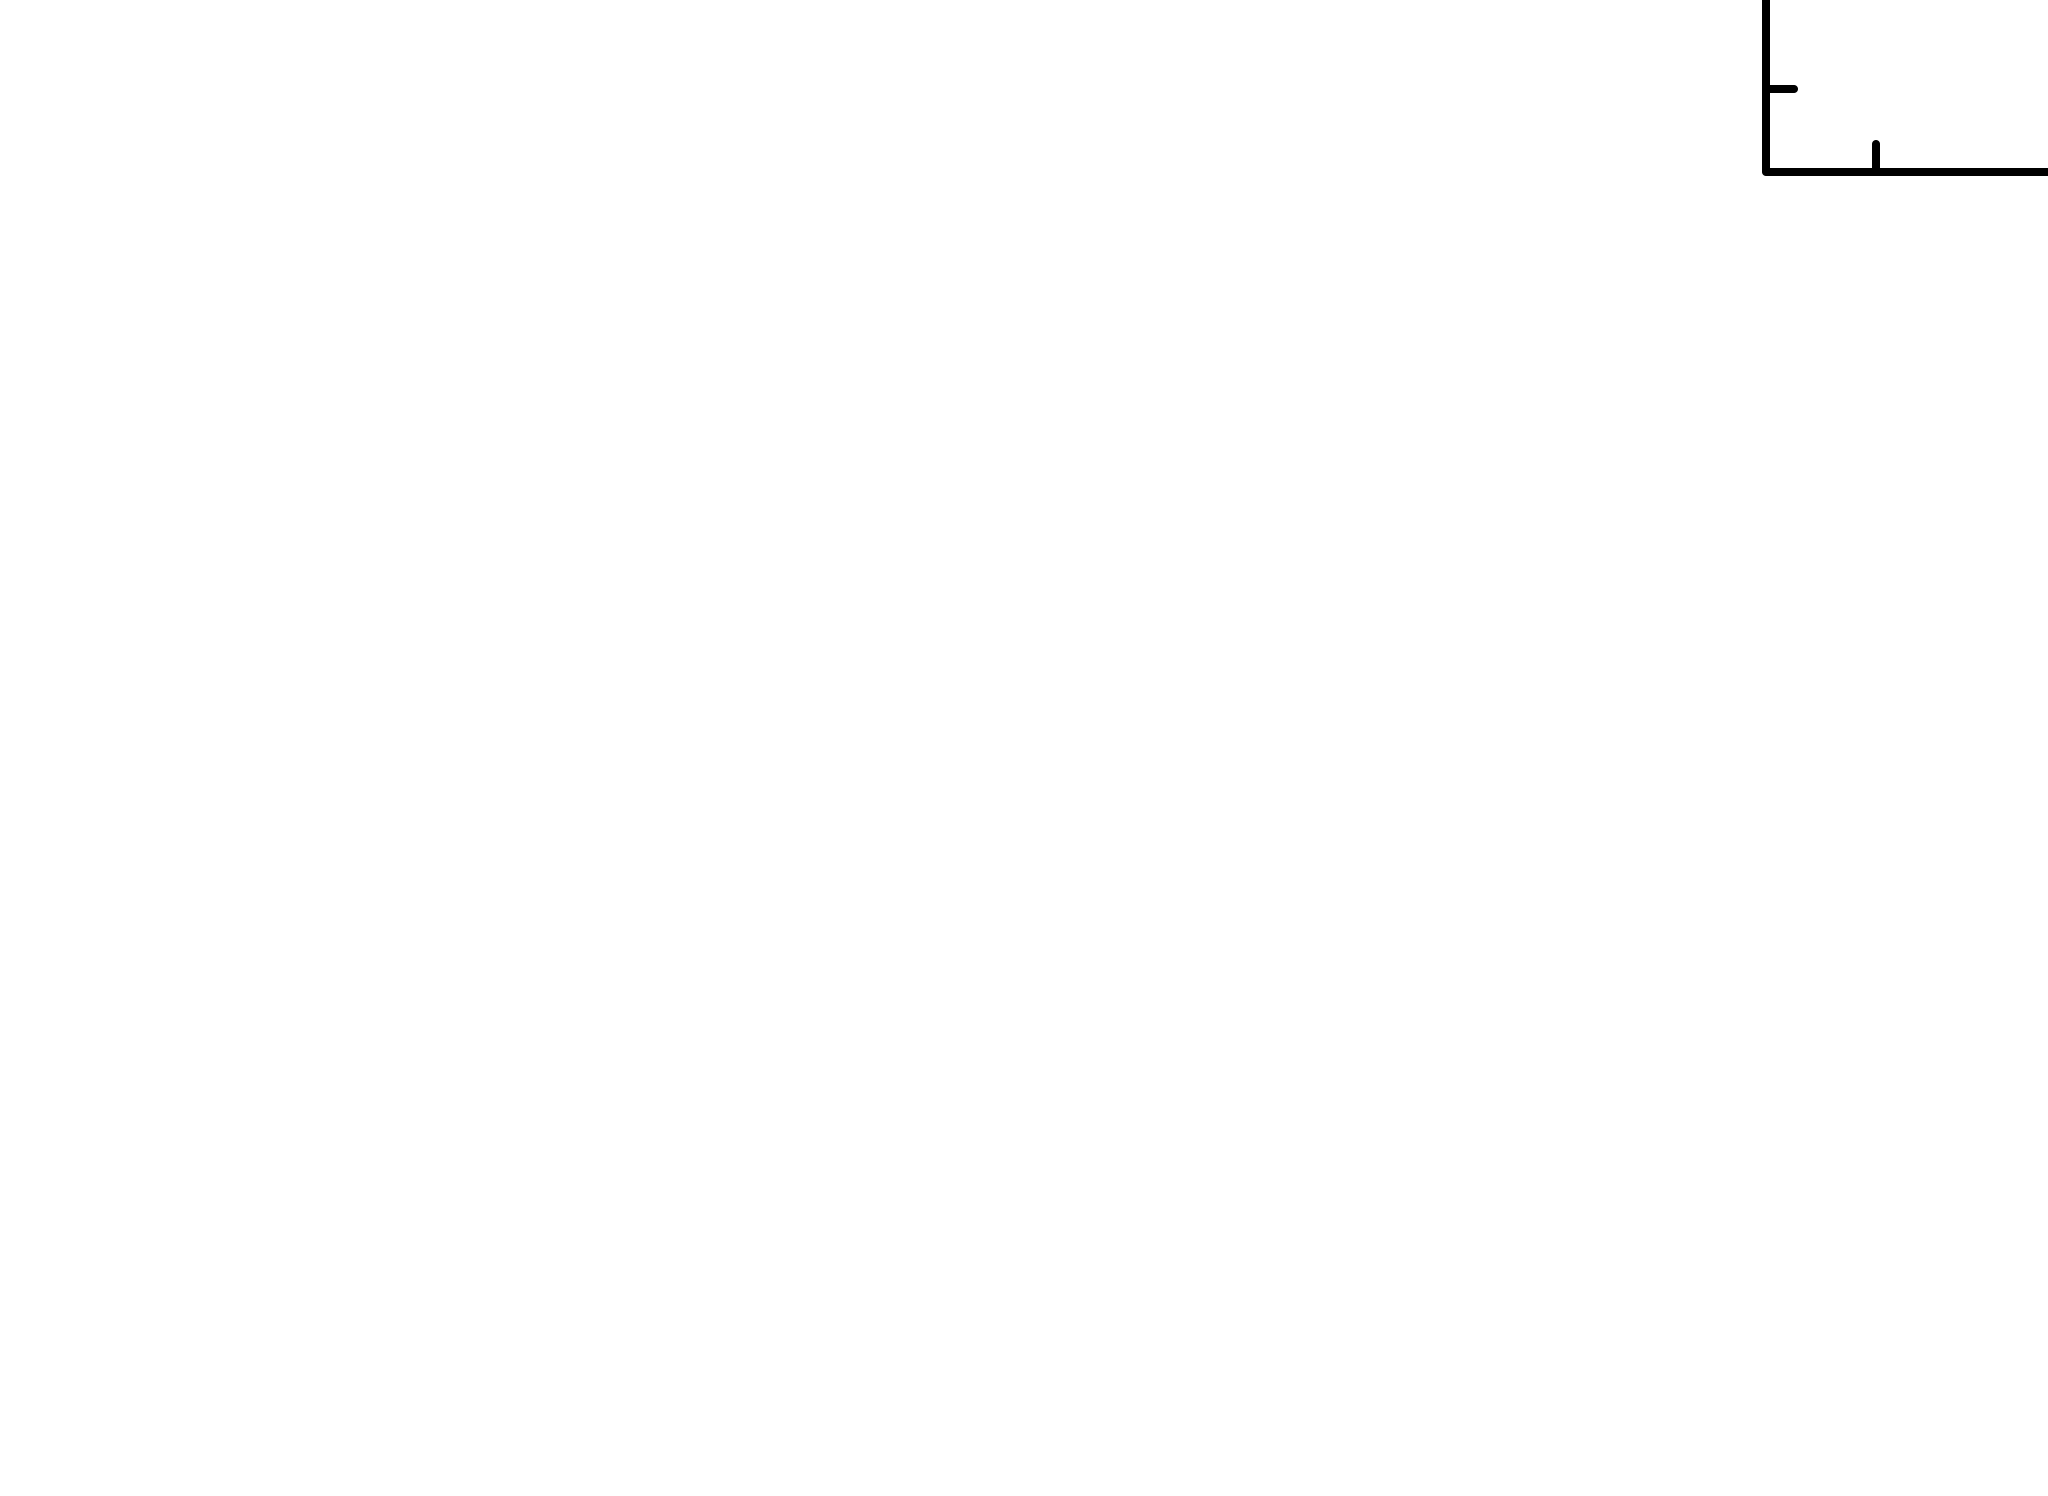

d              1.344261e+11     using 13 bins.

Test statistic : Chi-Squared              1.344261e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
20.6096      2.92469      -3       2.46452       27.1572   1.67485e-05
16.1236      160930       -4       3.95080       21.4137   2.93103e-05
15.731       17119.4       0       3.51805       24.1416   2.93354e-05
15.7209      1665.2       -1       2.75314       48.7368   2.82295e-05
15.601       9761.61      -2       3.23690       43.2069   3.02316e-05
15.5755      428.025      -1       2.96499       56.1648   3.05060e-05
15.5601      1243.51      -2       3.03542       70.5711   3.22154e-05
15.5576      3.30813      -2       2.95104       90.5578   3.36814e-05
 Variances and Principal Axes
                 1        2        3  
 2.8235E-11| -0

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

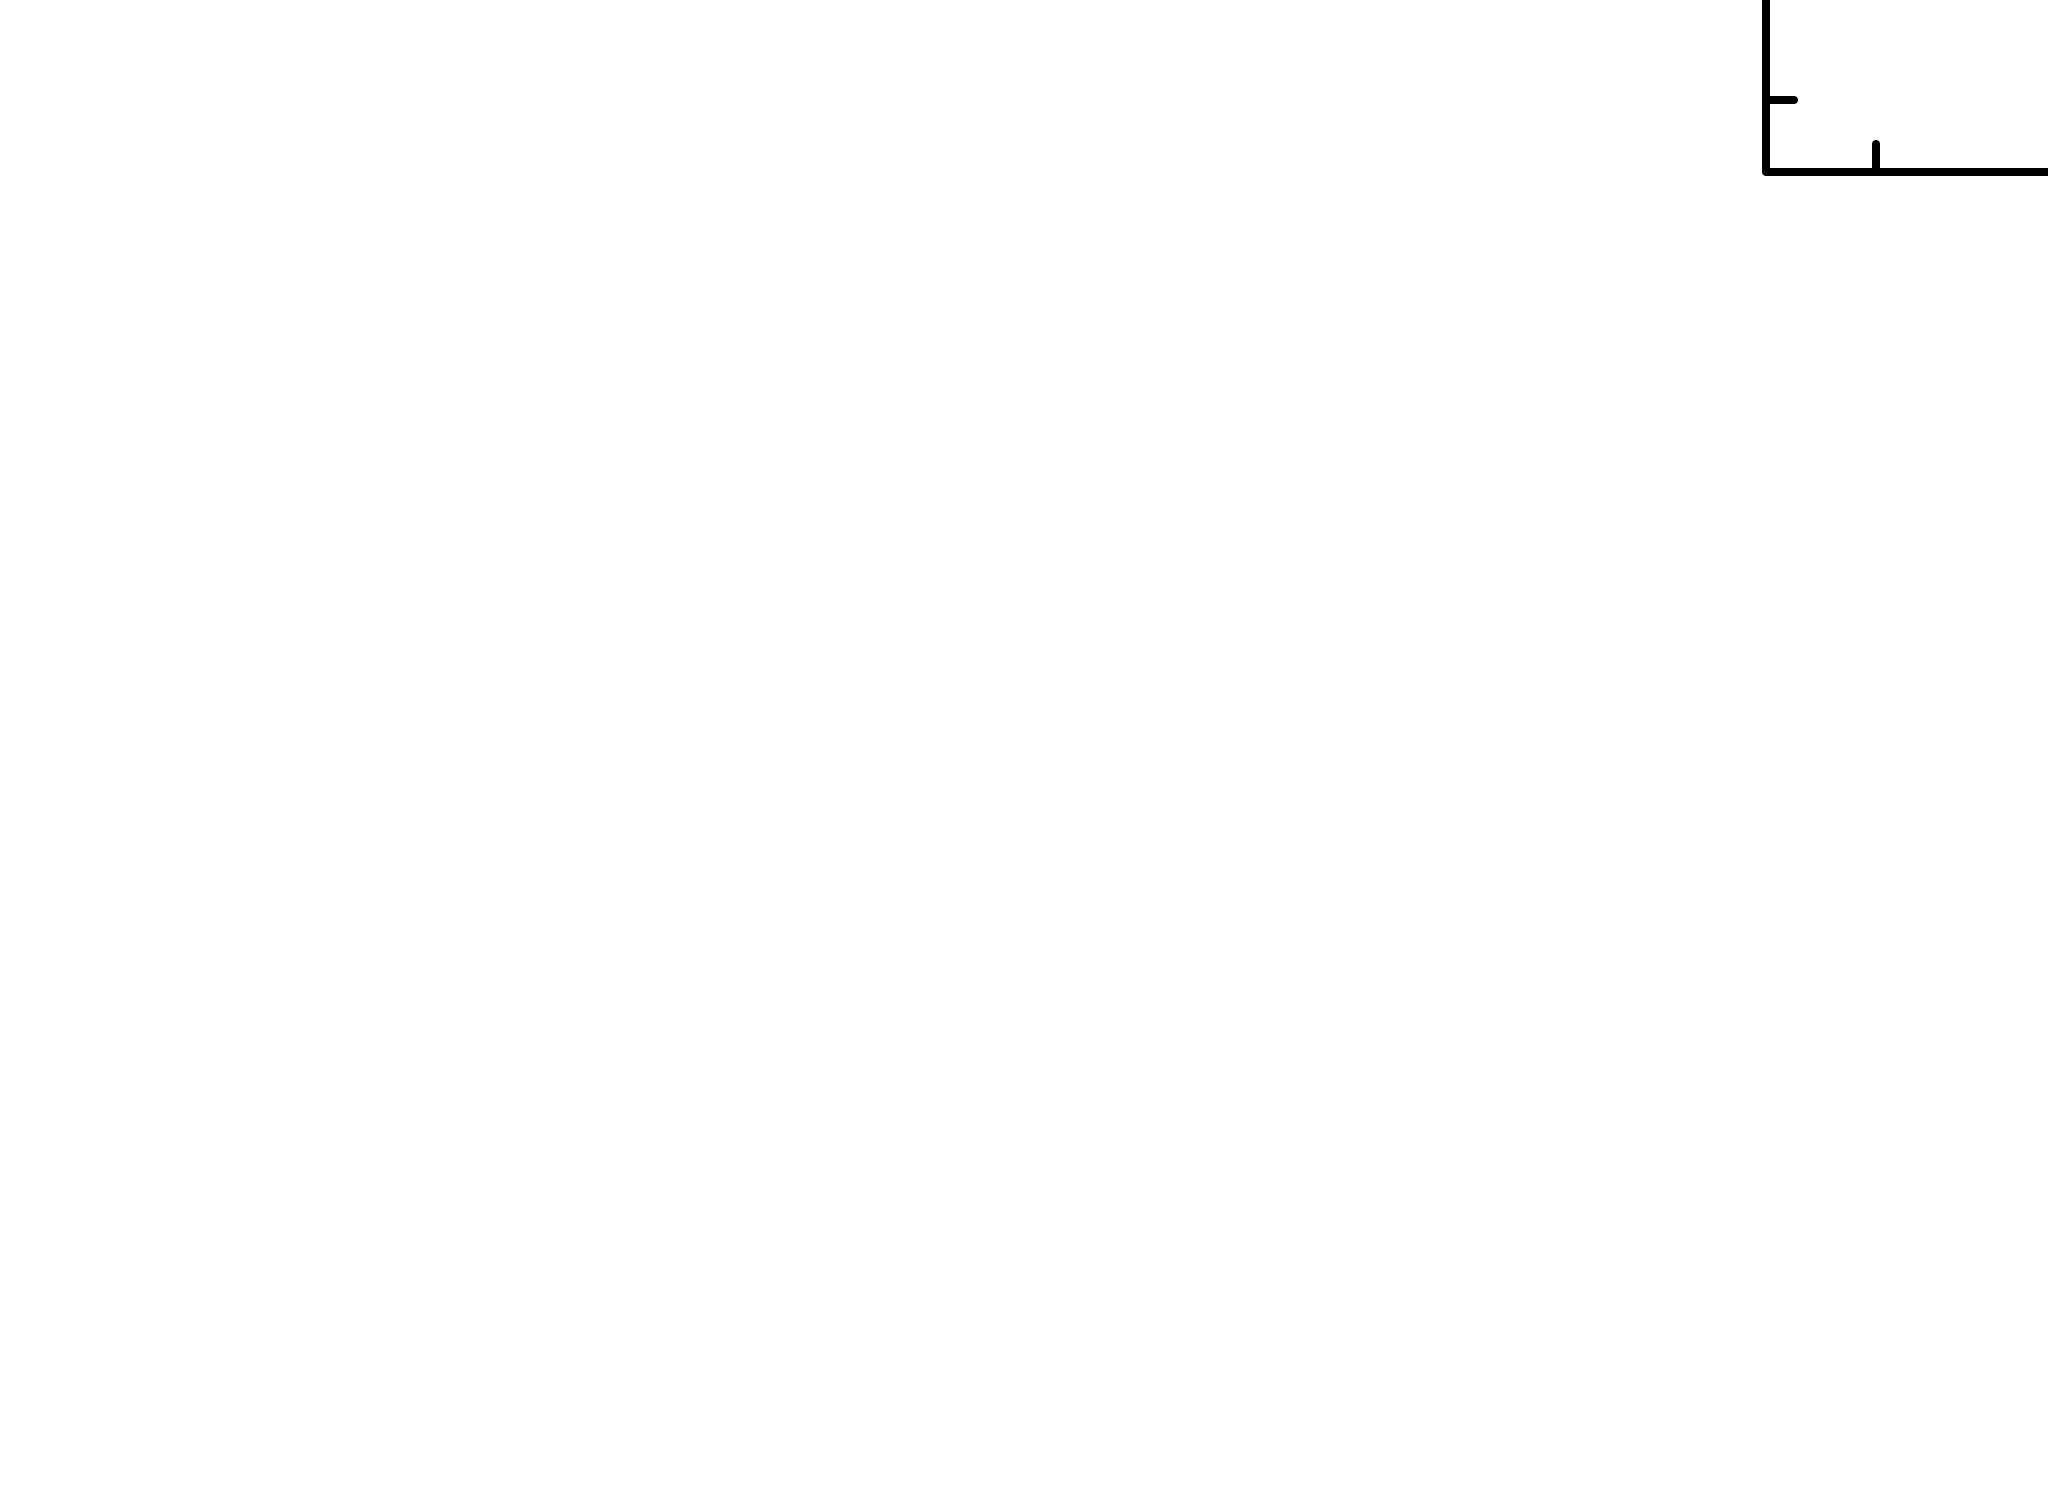


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.411506e+10     using 13 bins.

Test statistic : Chi-Squared              4.411506e+10     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
52.2273      0.20681      -3      0.429596       33.3127   

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.095177e+12     using 13 bins.

Test statistic : Chi-Squared              3.095177e+12     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
18.5835      0.277737     -1      0.640765       2.80429   2.83408e-06
18.1916      22096.8      -1       1.23666       2.52933   2.48982e-06
17.8136      27476.4      -2       1.08276       1.90697   1.39965e-06
1

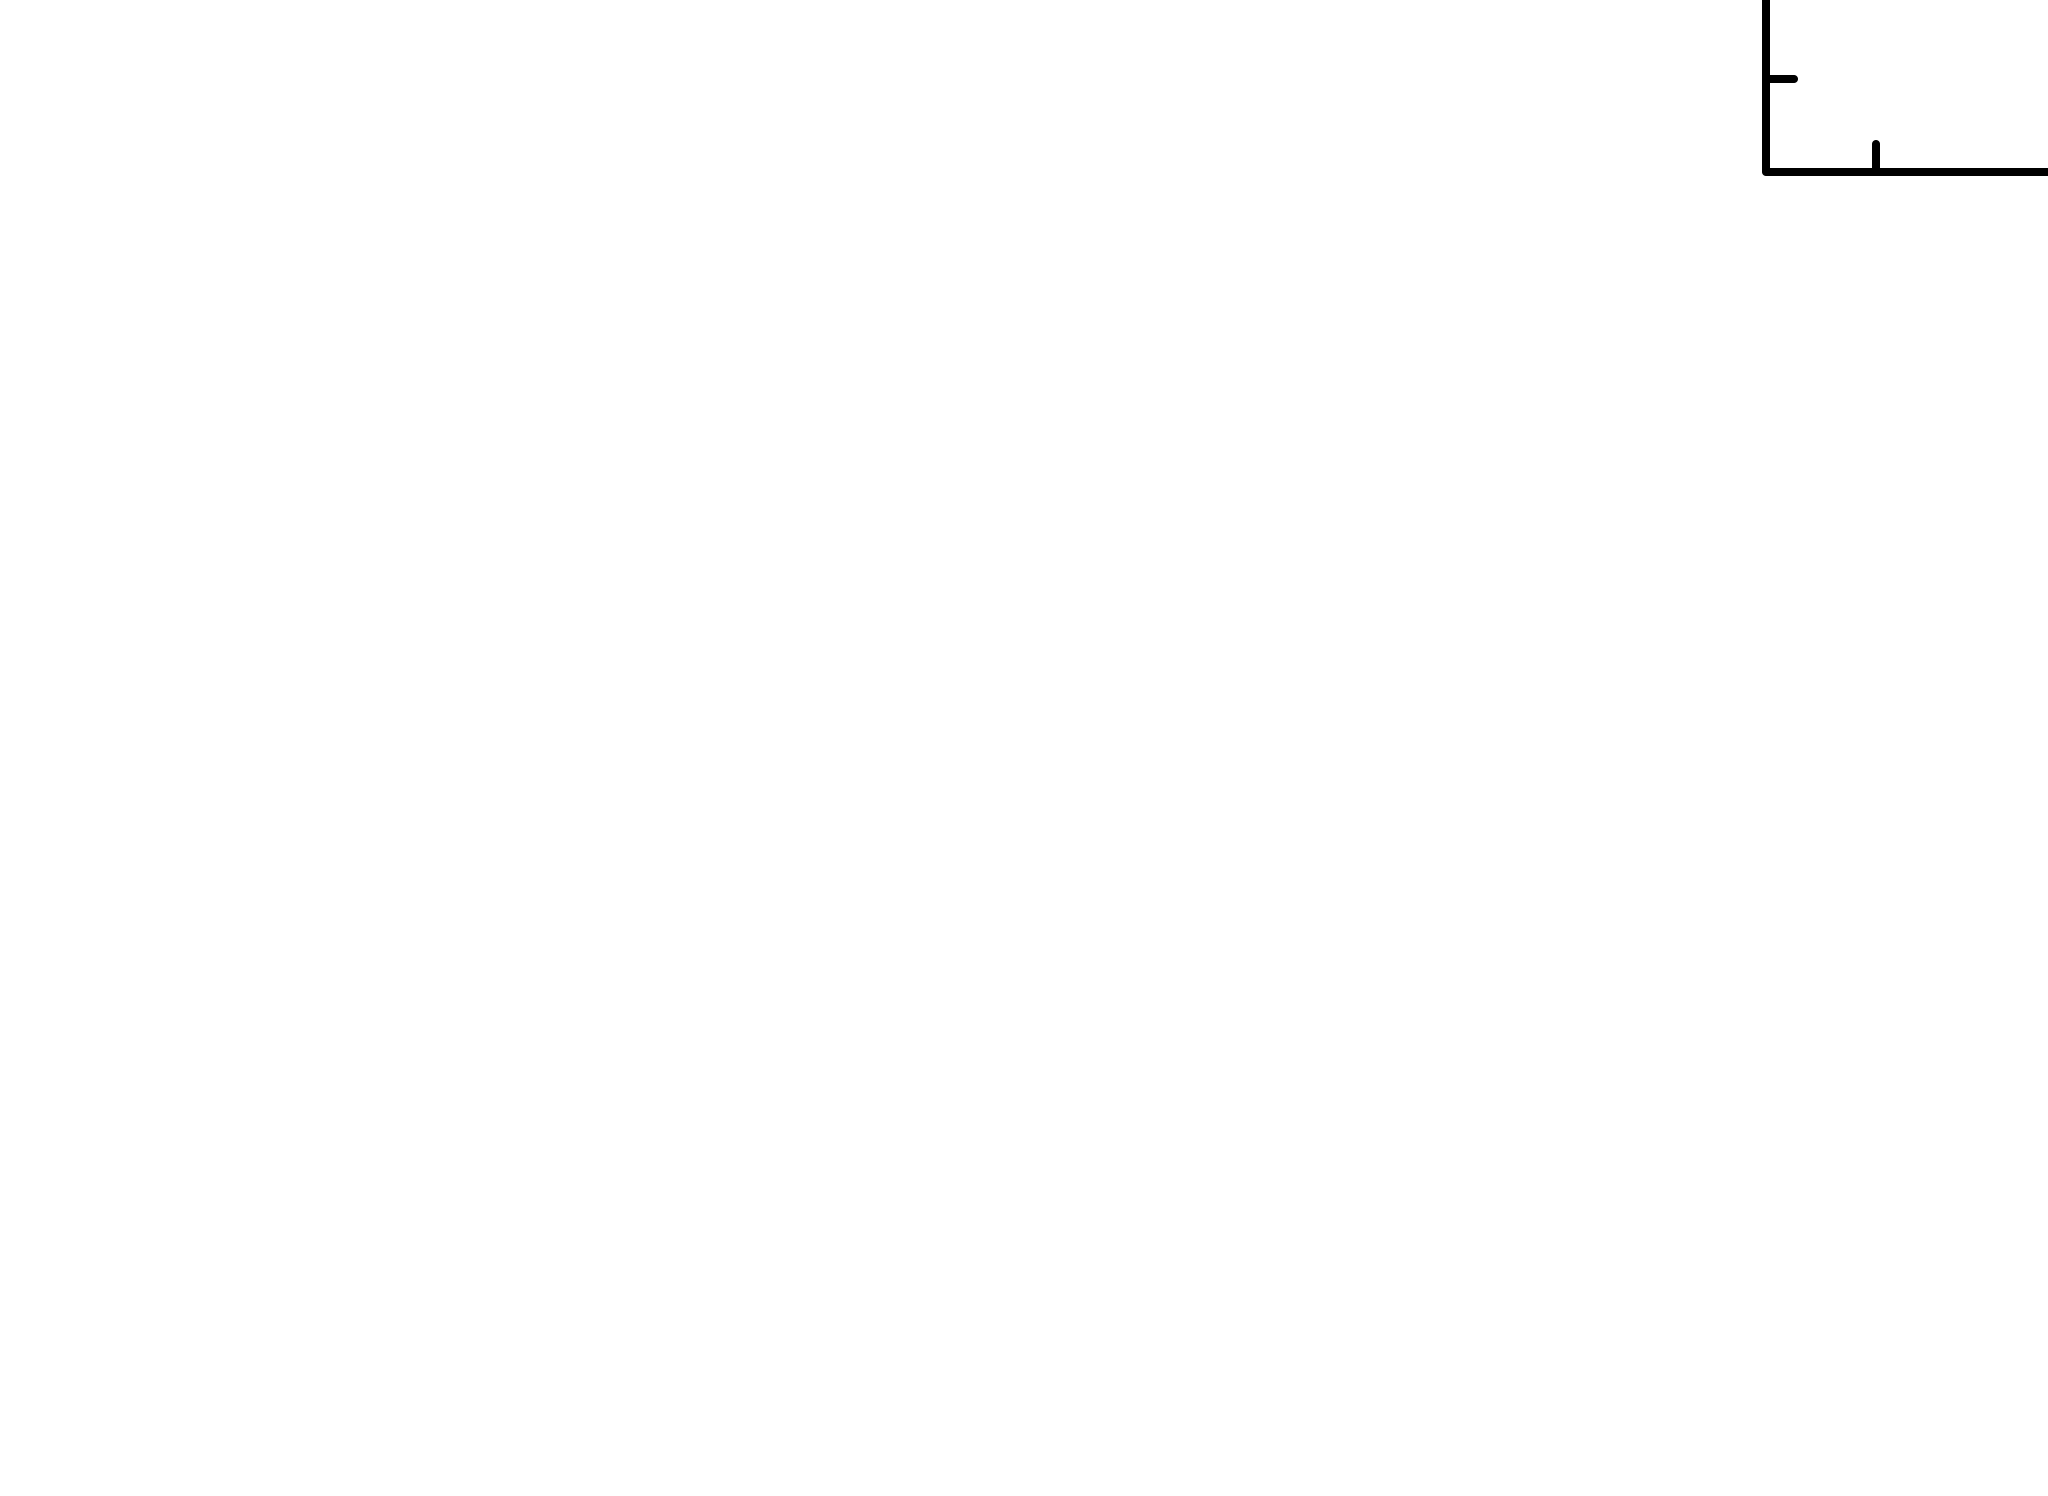

In [6]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

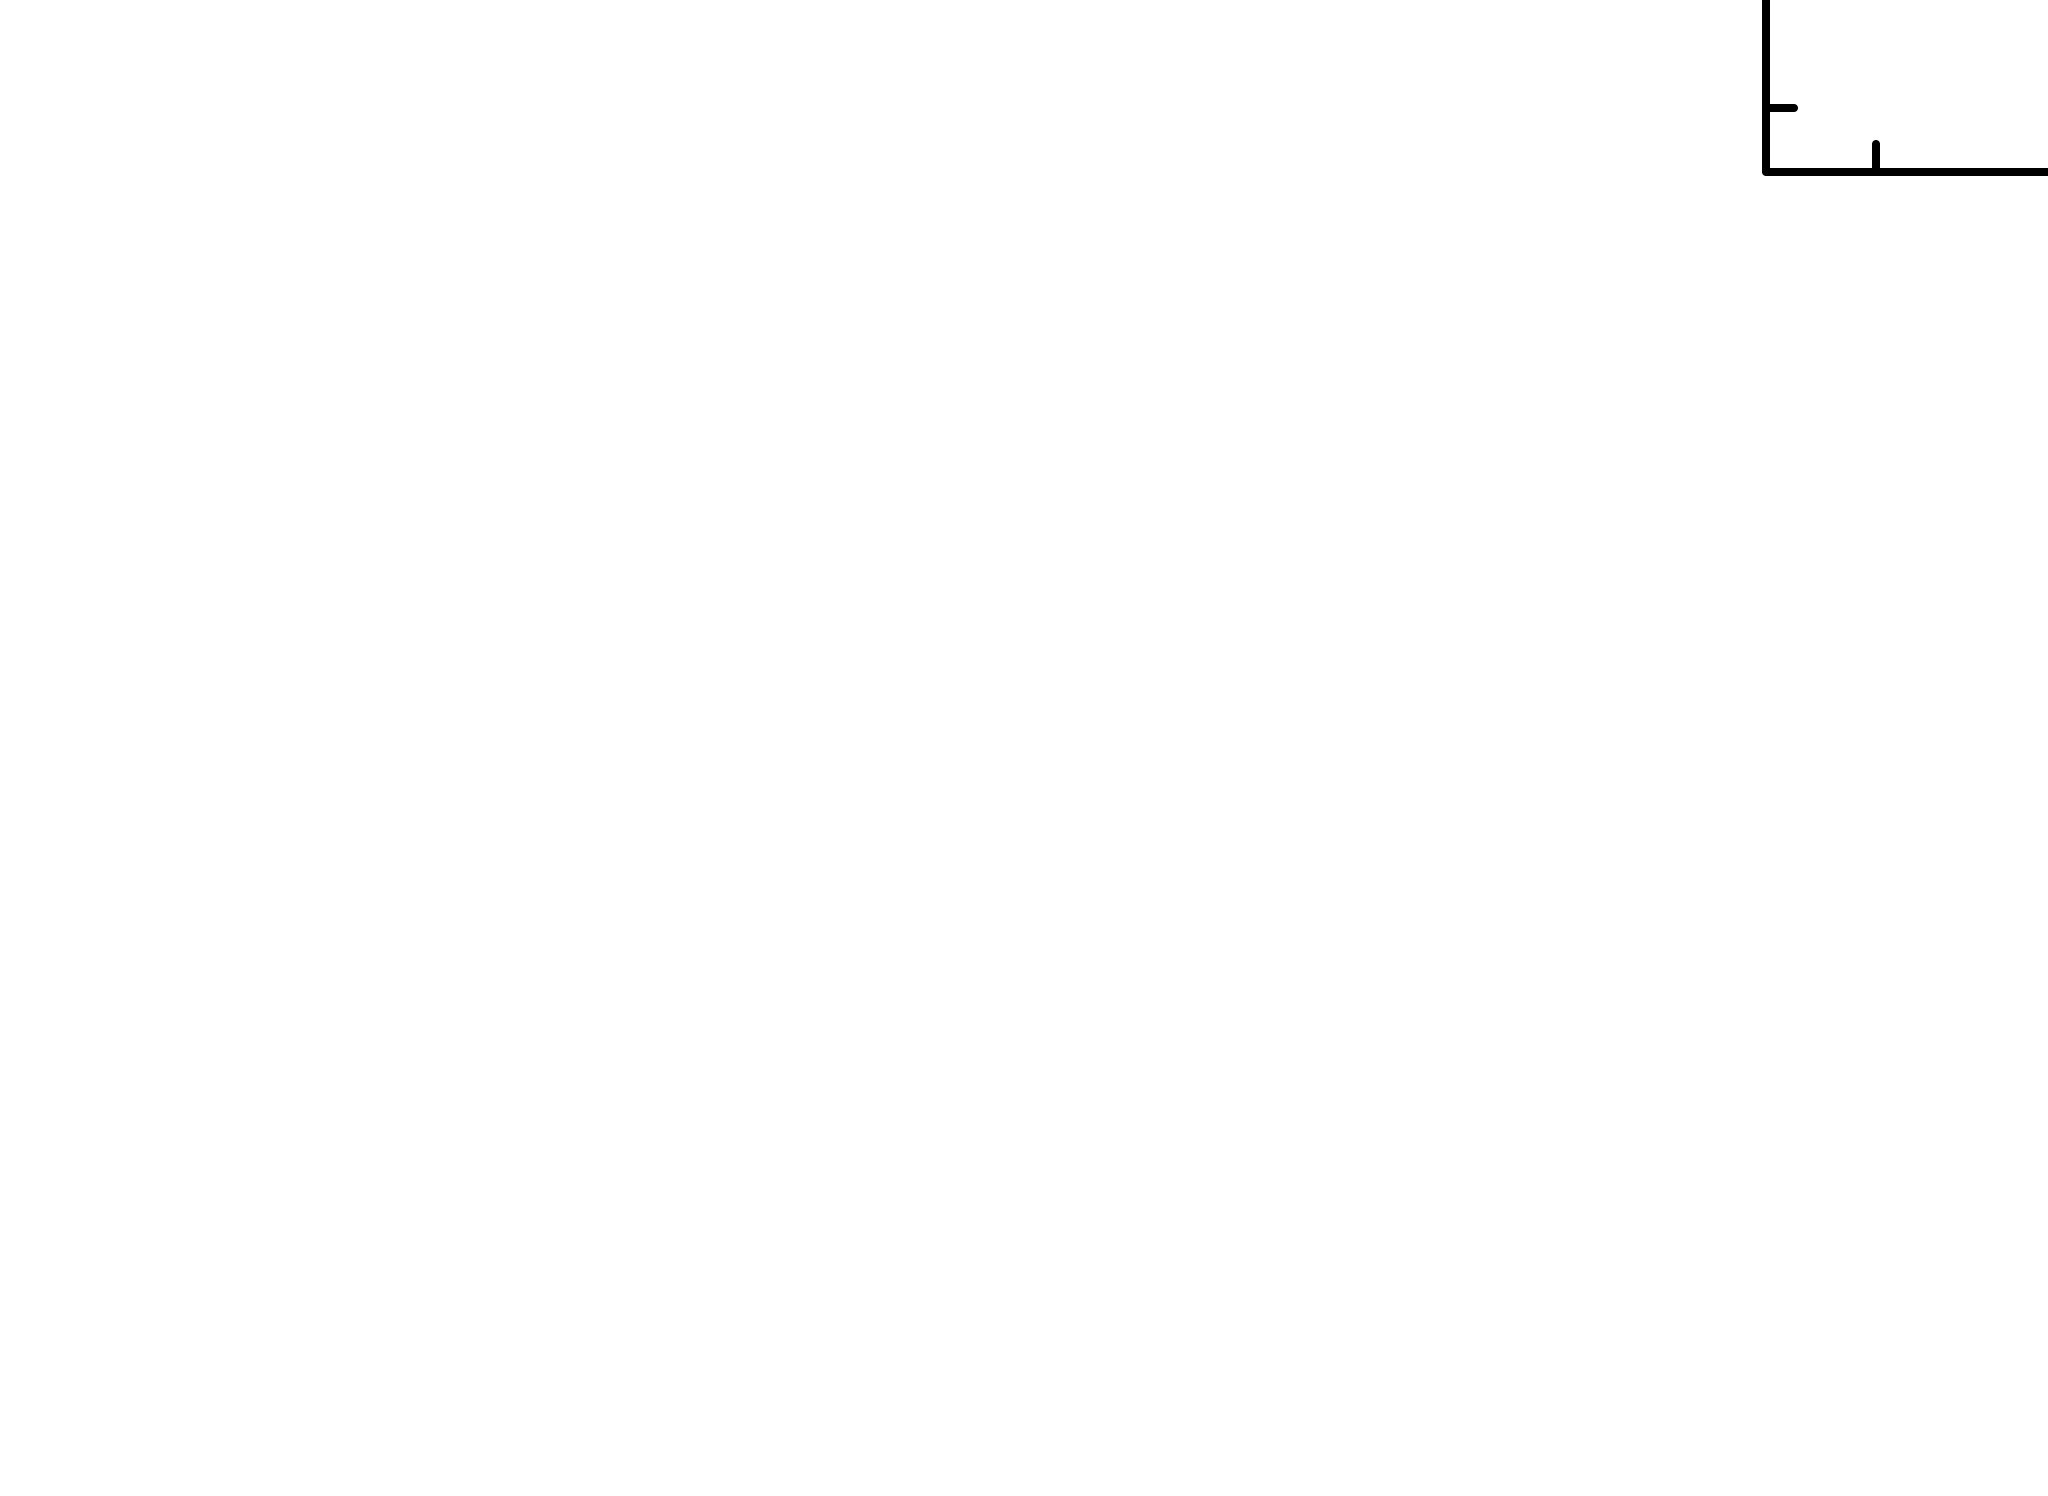


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.262727e+11     using 13 bins.

Test statistic : Chi-Squared              7.262727e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
18.0667      3.20331      -3       3.08180       1.43851   1.36583e-05
15.6316      173740       -4       3.60914       1.51102   2.07939e-05
15.5352      25950.3      -2       3.03050       1.40500   1.74186e-0

In [7]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.3294e-05 photons (1.1668e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [10]:
plx = 0.125
d_kpc = 1/plx
F_x = 1.1668*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

8.932188452298753e+32
